In [4]:
import cv2
import sys
import matplotlib.pyplot as plt
from IPython.display import clear_output, Image, display, HTML
import torch


c:\Users\sonor\miniconda3\envs\pytorch38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
yolo = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\sonor/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-7 Python-3.8.13 torch-1.12.1 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


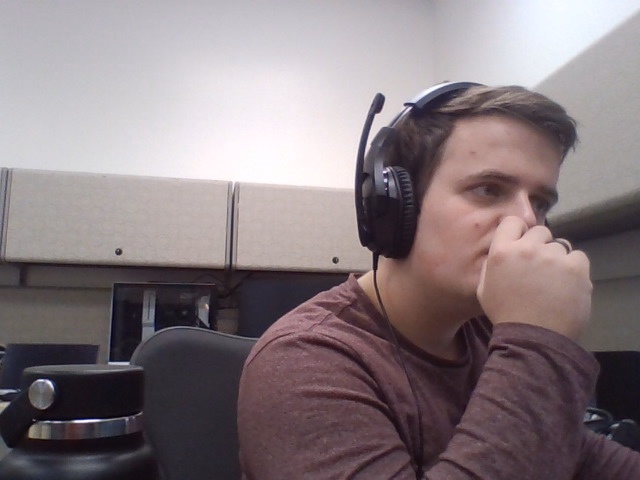

In [12]:
video = cv2.VideoCapture(0)
display_handle=display(None, display_id=True)

if video.isOpened() == False:
        print("Error reading video file")

while True:
    ret, frame = video.read()
    results = yolo(frame)
    _, frame = cv2.imencode('.jpeg', frame)

    frame = cv2.flip(frame, 1)
    display_handle.update(Image(data=frame.tobytes()))
    

    for j, prediction in enumerate(results.pandas().xyxy):
        df = results.pandas().xyxy[j]
        bounding_boxes_pedestrians = df.loc[df['class'] == 0]

        for i, row in bounding_boxes_pedestrians.iterrows():
            cv2.rectangle(frame, (int(row['xmin']), int(row['ymin'])), (int(row['xmax']), int(row['ymax'])), (255, 0, 0), 1)
    # result = face_detector.detect_emotions(frame)

    # for index, person in enumerate(result):

        # if not stats.__contains__(index):
            # stats[index] = []
        # stats[index].append(person['emotions'])
        # bounding_box = person['box']
        # cv2.rectangle(frame, (bounding_box[0], bounding_box[1]), (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]), (255, 0, 0), 4)

        # max_value = 0
        # for value in person['emotions'].values():
            # if value > max_value:
                # max_value = value

        # cv2.putText(frame, f"Person {index}", (bounding_box[0], bounding_box[1] - TEXT_SPACING), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
        # for i, (emotion, value) in enumerate(person['emotions'].items()):
            # if value == max_value:
                # color = (0, 255, 0)
            # else:
                # color = (0, 0, 255)
            # cv2.putText(frame, f"{emotion}: {value}", (bounding_box[0], bounding_box[1] + bounding_box[3] + TEXT_SPACING * (i + 1)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1, cv2.LINE_AA)

    if ret == True:
        
        display_handle.update(Image(data=frame.tobytes()))

        # cv2.imshow('Press q to close', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break

video.release()
cv2.destroyAllWindows()